METHOD 1

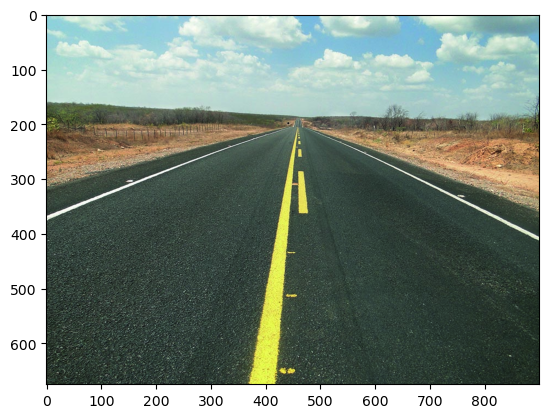

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Sitio-Novo-Amarante-MA-900.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

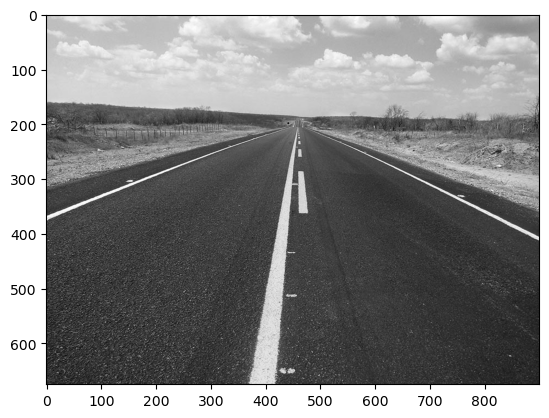

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray2)

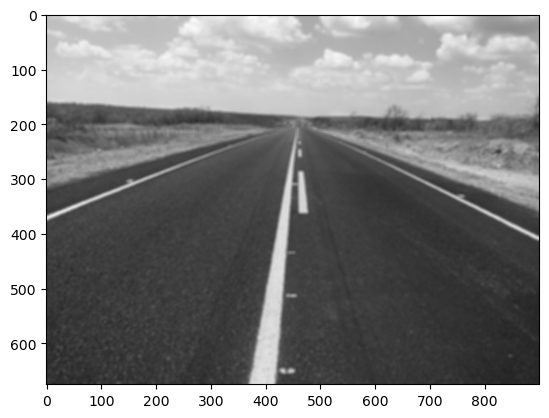

In [3]:
blurred = cv2.GaussianBlur(gray,(7,7),cv2.BORDER_REFLECT_101)
blurred2 = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
plt.imshow(blurred2)

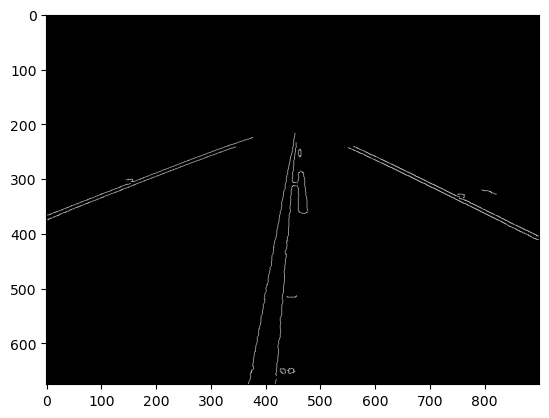

In [4]:
edges = cv2.Canny(blurred, 100, 200)
output = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(output)

In [5]:
lines = cv2.HoughLines(edges, 1, (2*np.pi)/180, 150)
lines

array([[[-3.0000000e+01,  2.0245819e+00]],

       [[-2.5000000e+01,  2.0245819e+00]],

       [[ 4.8300000e+02,  1.7453292e-01]]], dtype=float32)

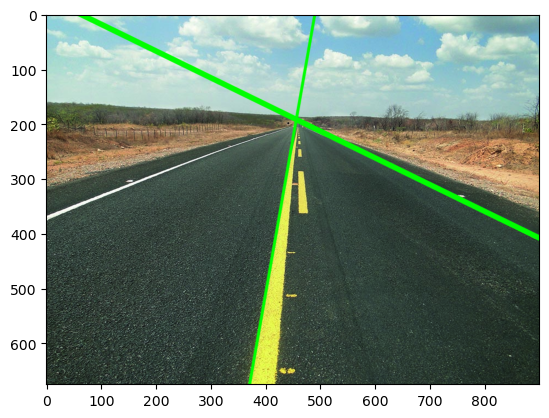

In [6]:
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    
    a = np.cos(theta)
  
    b = np.sin(theta)
  
    x0 = a*r
    y0 = b*r
  

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
  
    
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3,cv2.LINE_AA)
  
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

Method2

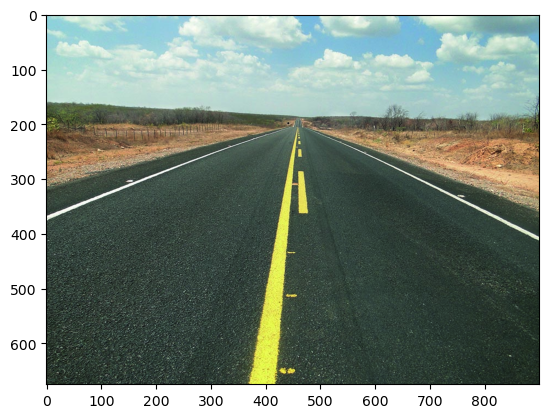

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Sitio-Novo-Amarante-MA-900.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

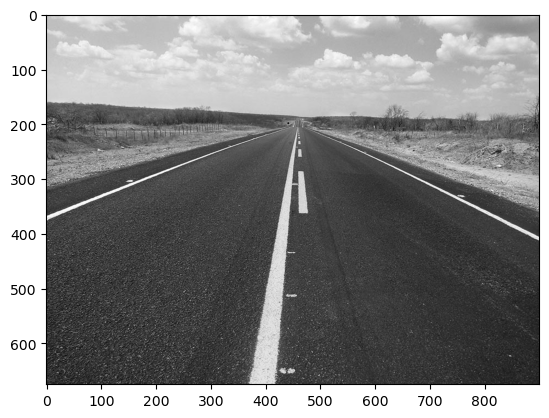

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray2)

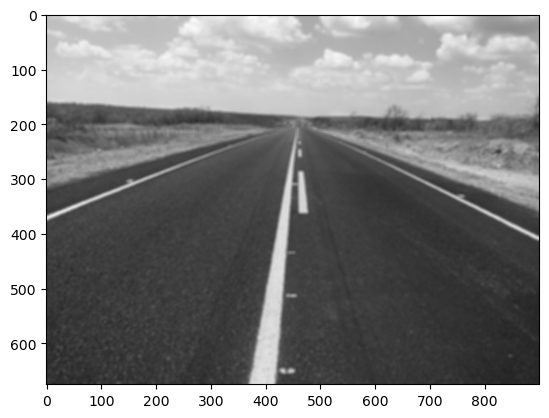

In [9]:
blurred = cv2.GaussianBlur(gray,(7,7),cv2.BORDER_REFLECT_101)
blurred2 = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
plt.imshow(blurred2)

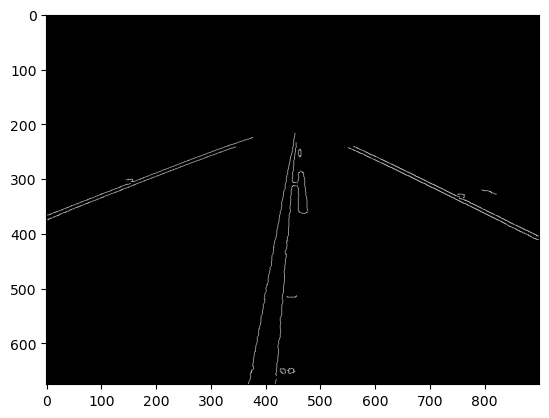

In [10]:
edges = cv2.Canny(blurred, 100, 200)
output = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(output)

In [11]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, None, 50, 10)
lines.shape

(22, 1, 4)

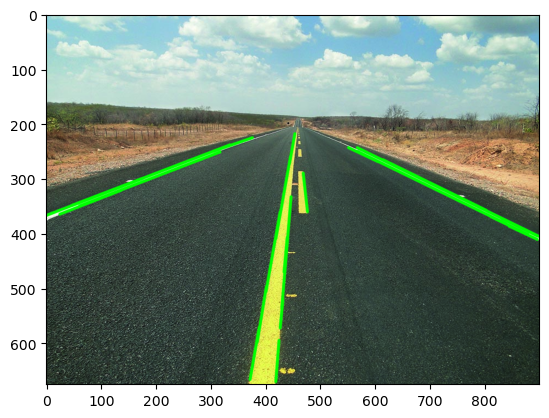

In [12]:
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,255,0), 3, cv2.LINE_AA)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

Method3

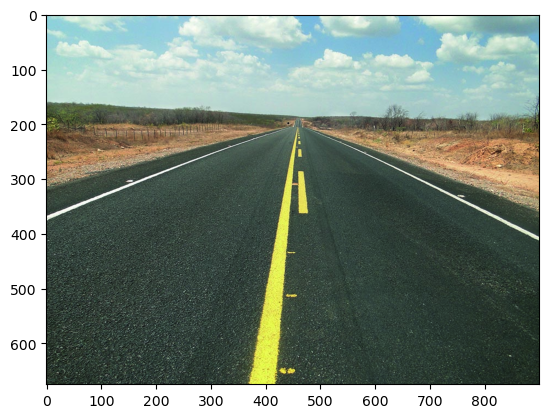

In [13]:
img = cv2.imread('Sitio-Novo-Amarante-MA-900.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [14]:
img.shape

(675, 900, 3)

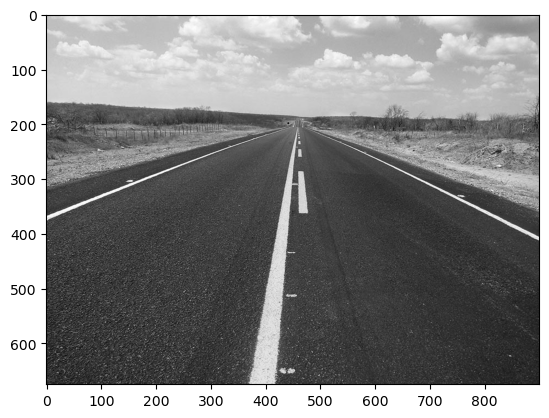

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray2)

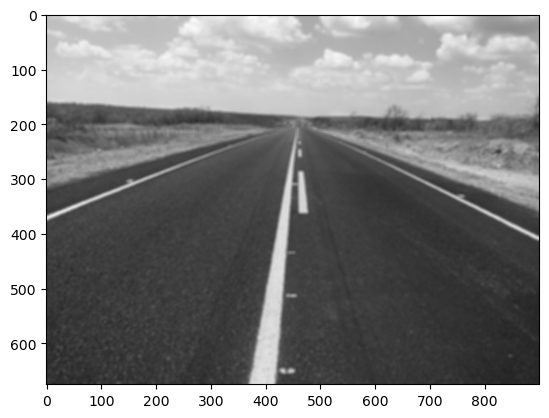

In [16]:
blurred = cv2.GaussianBlur(gray,(7,7),cv2.BORDER_REFLECT_101)
blurred2 = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
plt.imshow(blurred2)

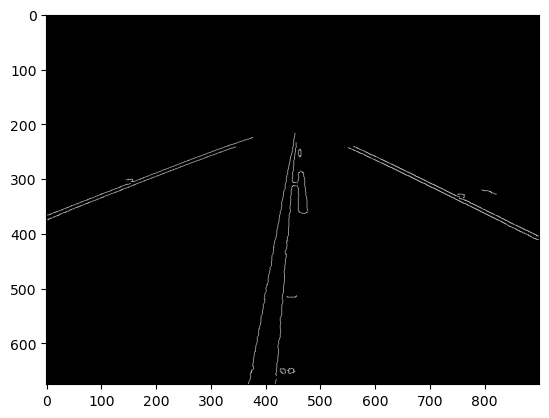

In [17]:
edges = cv2.Canny(blurred, 100, 200)
output = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(output)

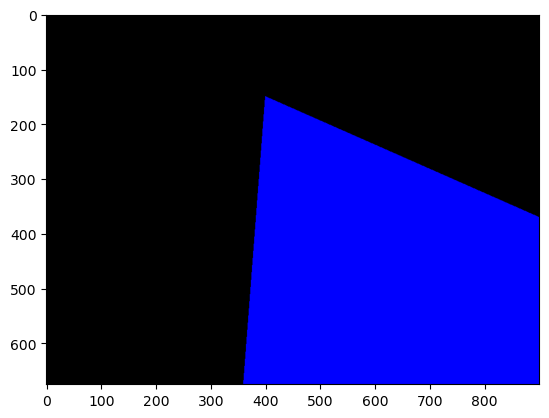

In [18]:
height = img.shape[0]
width = img.shape[1]
polygon = np.array([[(360, 675),(400, 150),(width,370), (width,height)]])
mask = np.zeros_like(img)
mask = cv2.fillPoly(mask,polygon,255)
mask2 = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask2)

In [19]:
height = img.shape[0]
width = img.shape[1]
polygon = np.array([[(360, 675),(400, 150),(width,370), (width,height)]])
def region(image,polygon):
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask,polygon,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image


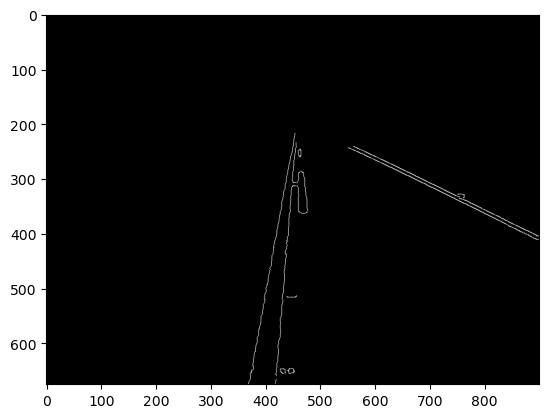

In [20]:
masked_image=region(edges,polygon)
mi2 = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.imshow(mi2)

In [22]:
lines = cv2.HoughLinesP(masked_image, 1, np.pi / 180, 30, None, 50, 20)
lines.shape

(14, 1, 4)

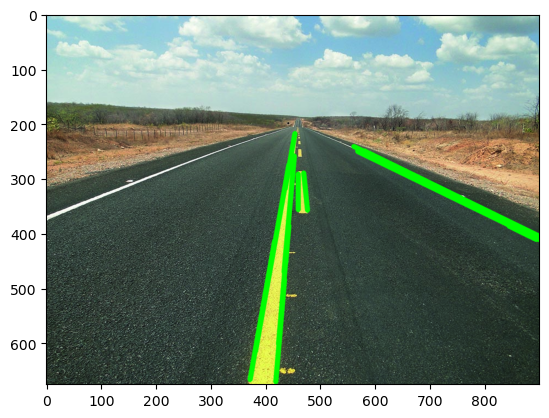

In [23]:
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,255,0), 7, cv2.LINE_AA)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)